### matplotlib: Несколько графиков [Домашнее задание]
> **Вы должны импортировать все необходимые пакеты самостоятельно.**

> **Пишите код только там, где это показано для записи. Не удаляйте комментарии!**
 

### Шаг 1

Пожалуйста, реализуйте функцию ```load_csv(filename)```, которая будет возвращать  спискок ```header``` и ```ndarray``` ```data```.

In [180]:
#Начало вашего кода
import traceback
import pandas as pd
import numpy as np
import csv
import os

def load_csv(filename):
    if os.path.exists(filename):
        with open(filename, 'r') as f:
            lines = f.readlines()
            header = lines[0].strip().split(',')
            data = [line.strip().split(',') for line in lines[1:]]
        print(header)
        for row in data[:5]:
            print(row)
        return header, data
    else:
        return f'Error: file {filename} does not exist'
    
#Конец вашего кода
header, data=load_csv("Social_Network_Ads.csv")


['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
['15624510', 'Male', '19', '19000', '0']
['15810944', 'Male', '35', '20000', '0']
['15668575', 'Female', '26', '43000', '0']
['15603246', 'Female', '27', '57000', '0']
['15804002', 'Male', '19', '76000', '0']


### Ожидаемый результат:

```
['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
['15624510', 'Male', '19', '19000', '0']
['15810944', 'Male', '35', '20000', '0']
['15668575', 'Female', '26', '43000', '0']
['15603246', 'Female', '27', '57000', '0']
['15804002', 'Male', '19', '76000', '0']
```

### Шаг 2

Пожалуйста, реализуйте функцию ```preprocess (data, idx)```, которая преобразует элементы столбца ```idx``` в числа. В конце эта функция вернет данные со всеми элементами, преобразованными в ```int```, и словарь ```num2str```, который содержит число в качестве ключа и ```str``` в качестве значения.

**Подсказка: используйте ```ndarray.copy()```, чтобы не потерять исходные данные.**

In [181]:
#Начало вашего кода
def preprocess(data, idx):
    processed = data.copy()
    np_processed = np.array(processed)
    
    unique_values = np.unique(np_processed[:, idx])
    
    num2str = {i:val for i, val in enumerate(unique_values)}
    
    for i, val in enumerate(unique_values):
        np_processed[np_processed[:,idx]==val, idx]=i
    res = np_processed.astype(int)
    return res, num2str
    
#Конец вашего кода
np_data,num2str=preprocess(data,1)
print(num2str)
print(np_data)
print(type(np_data))

{0: 'Female', 1: 'Male'}
[[15624510        1       19    19000        0]
 [15810944        1       35    20000        0]
 [15668575        0       26    43000        0]
 ...
 [15654296        0       50    20000        1]
 [15755018        1       36    33000        0]
 [15594041        0       49    36000        1]]
<class 'numpy.ndarray'>


### Ожидаемый результат:

```
{0: 'Female', 1: 'Male'}
[[15624510        1       19    19000        0]
 [15810944        1       35    20000        0]
 [15668575        0       26    43000        0]
 ...
 [15654296        0       50    20000        1]
 [15755018        1       36    33000        0]
 [15594041        0       49    36000        1]]
```

### Шаг 3

Пожалуйста, реализуйте функцию  ```statistics(data, idx)```, которая вычисляет базовую статистику для данного столбца ```idx``` в ```ndarray``` ```data```. Функция должна возвращать словарь рассчитанных значений.

In [182]:
#Начало вашего кода
def statistics(data, idx):
    df_data = pd.DataFrame(data.copy())
    target = df_data.iloc[:,idx]
    my_stat = {'mean':target.mean(), 'std':target.std(), 'median':target.median(), 'max':target.max(),'min':target.min()}
    return my_stat
#Конец вашего кода
age_stats=statistics(np_data,2)
salary_stats=statistics(np_data,3)

print(age_stats)
print(salary_stats)

{'mean': 37.655, 'std': 10.48287659730792, 'median': 37.0, 'max': 60, 'min': 18}
{'mean': 69742.5, 'std': 34096.960282424785, 'median': 70000.0, 'max': 150000, 'min': 15000}


### Ожидаемый результат:

```
{'mean': 37.655, 'std': 10.46976480156073, 'median': 37.0, 'max': 60, 'min': 18}
{'mean': 69742.5, 'std': 34054.3124104716, 'median': 70000.0, 'max': 150000, 'min': 15000}
```

### Шаг 4

Постройте гистограммы (```histograms```) на основе информации о возрасте и зарплате.

Возрастная гистограмма должна содержать 6 бинов (```bins```), а гистограмма зарплаты должна содержать 9 (```bins```). Пожалуйста, используйте результаты статистики из предыдущего шага, чтобы сгенерировать равные бины.

**Подсказка:** 
* установите размер фигуры в ```(10,5)```, используя ```plt.rcParams["figure.figsize]```
* установите аргумент прозрачности ```0.6```
* Пожалуйста, поверните xticklabels на 45 градусов. ```ax[i].set_xticklabels()```





Text(0.5, 1.0, 'Salary histogram')

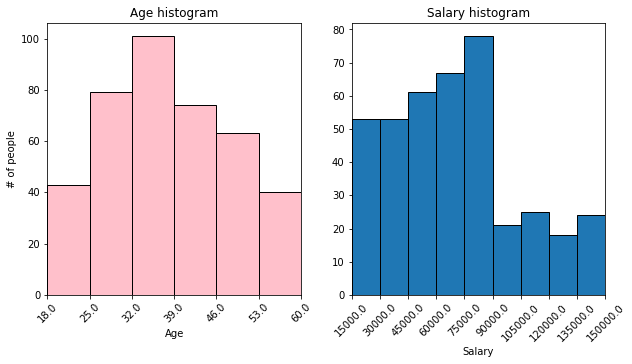

In [183]:
#Начало вашего кода
import matplotlib.pyplot as plt
##ge a datafram out of out numpy array
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5));


pd_data =data.copy()
df_data = pd.DataFrame(pd_data)
age_info = df_data.iloc[:,2]
sorted_age = age_info.sort_values()
#raveled = sorted_age.ravel()
age_list = sorted_age.tolist()
age_list=[int(x) for x in age_list]##convert all into int
#interval = 6
#intervals = [age_list[i:i+interval] for i in range(0, len(age_list), interval)]
range_min=age_list[0]
range_max = age_list[-1]

values, bins, _ = ax1.hist(age_list, bins=6, range=(range_min, range_max), edgecolor='black', color = 'pink', alpha=1)
ax1.set_xticks(bins)
ax1.set_xlim(range_min, range_max)
ax1.set_xticklabels(ax1.get_xticks(), rotation=45)##rotate xticks
#print(intervals)
ax1.set_xlabel('Age')
ax1.set_ylabel('# of people')
ax1.set_title('Age histogram')

'''values, bins, _ = plt.hist(age_list, bins=6, range=(range_min, range_max), edgecolor='black')
plt.xticks(bins)
plt.xlim(range_min, range_max)
#print(intervals)
plt.xlabel('Age')
plt.ylabel('# of people')
plt.title('Age histogram')'''

salary_info = df_data.iloc[:,3]
sorted_salary = salary_info.sort_values()
salary_list = sorted_salary.tolist()
salary_list=[int(x) for x in salary_list]
sal_min = min(salary_list)
sal_max = max(salary_list)

values2, bins2, _2 = ax2.hist(salary_list, bins = 9, range=(sal_min, sal_max), edgecolor = 'black')
ax2.set_xticks(bins2)
ax2.set_xticklabels(ax2.get_xticks(), rotation=45)
ax2.set_xlim(sal_min, sal_max)
#print(intervals)
ax2.set_xlabel('Salary')
#plt.ylabel('# of people')
ax2.set_title('Salary histogram')
#plt.show()'''


#Конец вашего кода

### Ожидаемый результат:

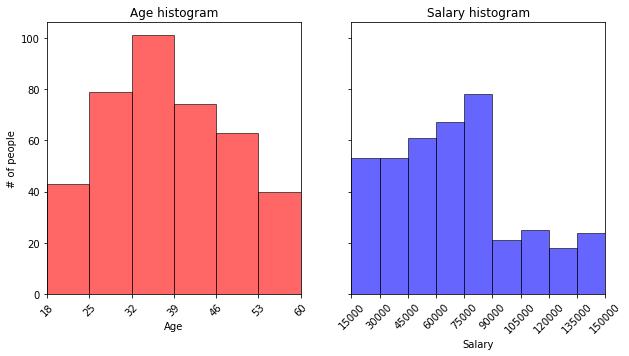


### Шаг 5

Пожалуйста, получите отдельные ```ndarrays``` женщин, которые приобрели, не приобрели, мужчин, которые приобрели, не приобрели продукт, используя логическое индексирование, которое вы изучали в лекциях NumPy. 
Вы должны получить 4 отдельных ```ndarrays```.

In [184]:
#Начало вашего кода
female_purchased=np_data[(np_data[:,1]==0) & (np_data[:,4]==1)]
female_notpurchased = np_data[(np_data[:,1]==0) & (np_data[:,4]==0)]
male_purchased = np_data[(np_data[:,1]==1) & (np_data[:,4]==1)]
male_notpurchased = np_data[(np_data[:,1]==1) & (np_data[:,4]==0)]

#Конец вашего кода

print(female_purchased.shape)
print(female_notpurchased.shape)
print(male_purchased.shape)
print(male_notpurchased.shape)

(77, 5)
(127, 5)
(66, 5)
(130, 5)


### Ожидаемый результат:

```(77, 5)
(127, 5)
(66, 5)
(130, 5)```

### Шаг 6

Используя полученные ```ndarrays``` из предыдущего шага, сделайте следующий график:

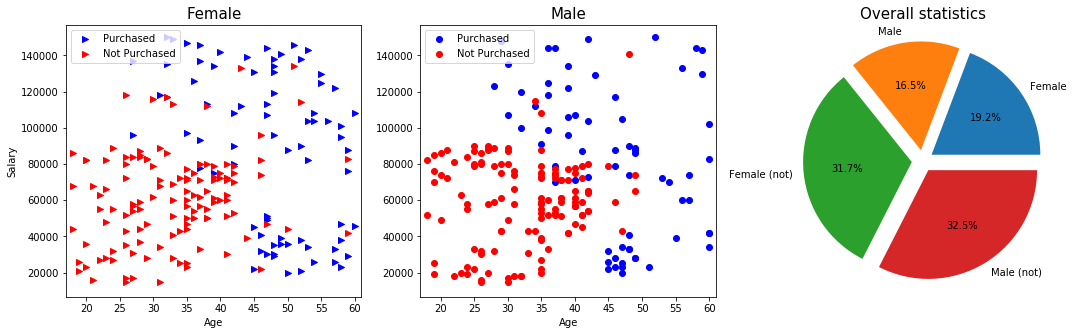


**Подсказка:** 
* установите размер фигуры ```(18,5)```, используя ```plt.rcParams["figure.figsize]```.
* установите размер шрифта ```title``` на ``15``

Text(0.5, 1.0, 'Overall statistics')

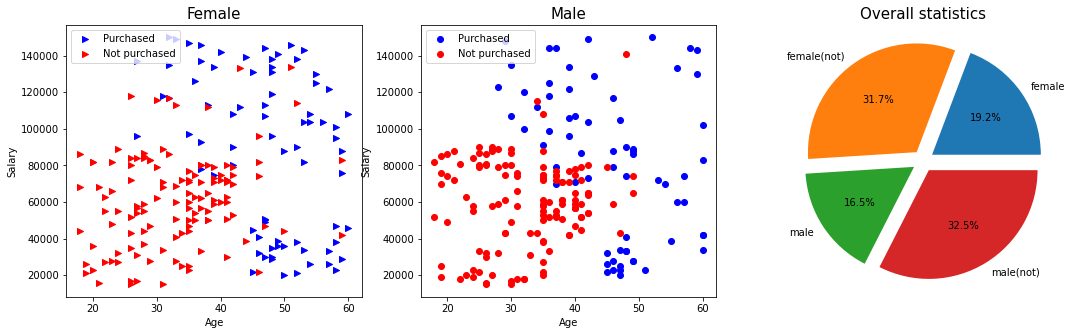

In [215]:
#Начало вашего кода
##first we are initiating all 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18,5))

##now first subplot is gonna be a scatter plot
ax1 = axs[0] ##access the first plot
gender = np_data[:,1] 

female_data = np_data[gender==0]##filter only female ones

purchased_female = female_data[female_data[:, 4]==1] 
not_purchased_female = female_data[female_data[:,4]==0]

ax1.scatter(purchased_female[:,2], purchased_female[:,3], color = 'blue', marker='>', label = 'Purchased')
ax1.scatter(not_purchased_female[:,2], not_purchased_female[:,3], color='red', marker = '>', label = 'Not purchased') 

ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.set_title('Female', fontsize=15)
ax1.legend()

##the same goes for the second subplot but for male subjects
ax2 = axs[1]
male_data = np_data[np_data[:,1]==1]

purchased_male = male_data[male_data[:,4]==1]
not_purchased_male = male_data[male_data[:,4]==0]
ax2.scatter(purchased_male[:, 2], purchased_male[:, 3], color = 'blue', marker='o', label = 'Purchased')
ax2.scatter(not_purchased_male[:, 2], not_purchased_male[:, 3], color = 'red', marker = 'o', label = 'Not purchased')

ax2.set_xlabel('Age')
ax2.set_ylabel('Salary')
ax2.set_title('Male', fontsize=15)
ax2.legend()

ax3 = axs[2]

##calculate percentages for a pie
total = len(np_data[:,4])
female_pur = len(purchased_female)
percent_female_pur = (female_pur/total)*100

female_not = len(not_purchased_female)
percent_female_not = (female_not/total)*100

male_pur = len(purchased_male)
percent_male_pur = (male_pur/total)*100

male_not = len(not_purchased_male)
percent_male_not = (male_not/total)*100
#print(percent_male_not+percent_male_pur+percent_female_not+percent_female_pur)

percentages_list = [percent_female_pur, percent_female_not, percent_male_pur, percent_male_not]
labels2use = ['female', 'female(not)','male', 'male(not)']
explode = np.full(len(labels2use), 0.1)

ax3.pie(x=percentages_list, labels = labels2use, autopct=lambda x: f'{x:.1f}%', explode = explode)
ax3.set_title('Overall statistics', fontsize=15)
#Конец вашего кода

# Прекрасная работа!